In [20]:
import cv2
import matplotlib.patches as patches

import matplotlib.pyplot as plt
%matplotlib inline

##讀入照片
image=cv2.imread('data/Dog.JPG')

##因為CV2會將照片讀成BGR，要轉回來
image=image[:,:,::-1]

## 先設BBOX格式為[X,Y,W,H]
## 也就是左上角那一點的座標以及BBOX的寬和高

In [21]:
Ground_Truth_BBOX=[1900,700,1800,1800]
Prediction_BBOX=[1800,800,1500,1500]

## 轉換成 [X0,Y0,X1,Y1]

In [22]:
Ground_Truth_BBOX_Transform=[Ground_Truth_BBOX[0],
                             Ground_Truth_BBOX[1],
                             Ground_Truth_BBOX[0]+Ground_Truth_BBOX[2],
                             Ground_Truth_BBOX[1]+Ground_Truth_BBOX[3]]
Prediction_BBOX_Transform=[Prediction_BBOX[0],
                           Prediction_BBOX[1],
                           Prediction_BBOX[0]+Prediction_BBOX[2],
                           Prediction_BBOX[1]+Prediction_BBOX[3]]


C:\Users\Eki\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: The 'withdash' parameter of text() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'withdash', they should be pass as keyword, not positionally.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Eki\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The TextWithDash class was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Annotation instead.
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Eki\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: The 'withdash' parameter of text() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'withdash', they should be pass as keyword, not positionally.
  
C:\Users\Eki\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The TextWit

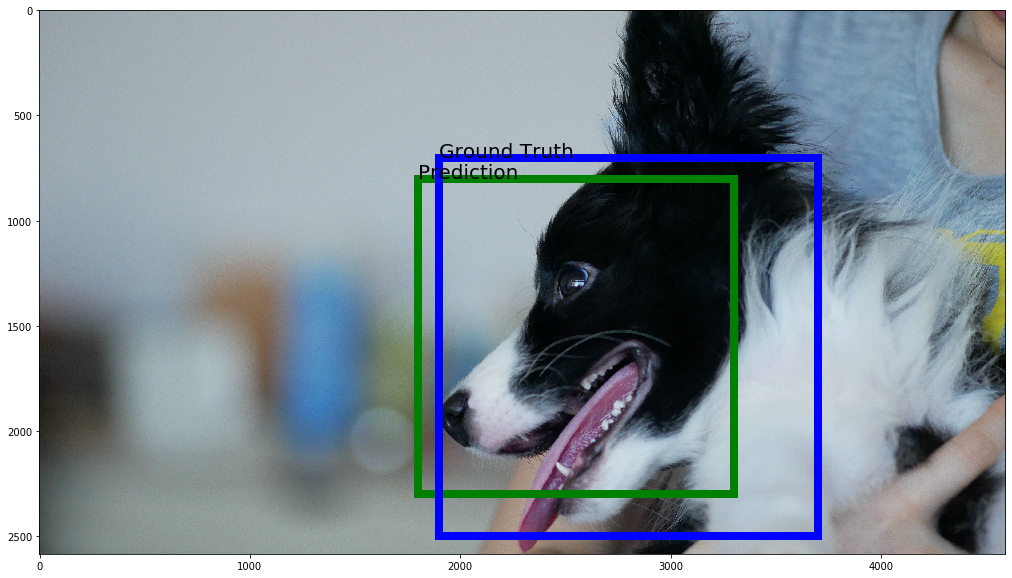

In [23]:
plt.rcParams['figure.figsize'] = (20, 10)


fig,ax = plt.subplots(1)

##畫出圖片
ax.imshow(image)

# 畫BBOX-Prediction
rect = patches.Rectangle((Prediction_BBOX[0],Prediction_BBOX[1]),Prediction_BBOX[2],Prediction_BBOX[3],linewidth=8,edgecolor='g',facecolor='none',)
ax.text(1800,800,'Prediction',withdash=True,size=20)
# 畫BBOX-Ground_Truth
rect_1 = patches.Rectangle((Ground_Truth_BBOX[0],Ground_Truth_BBOX[1]),Ground_Truth_BBOX[2],Ground_Truth_BBOX[3],linewidth=8,edgecolor='b',facecolor='none')
ax.text(1900,700,'Ground Truth',withdash=True,size=20)

# Add the patch to the Axes
ax.add_patch(rect)
ax.add_patch(rect_1)



plt.show()

## 定義IOU計算

In [30]:
def bb_intersection_over_union(boxA, boxB): #boxA = Ground_Truth_BBOX_Transform #boxB = Prediction_BBOX_Transform
    # determine the (x, y)-coordinates of the intersection rectangle (確定相交矩形的（x，y）坐標)
    '''找出比較大的X0'''
    xA = max(boxA[0], boxB[0])
    '''找出比較大的y0'''
    yA = max(boxA[1], boxB[1])
    '''找出比較小的X1'''
    xB = min(boxA[2], boxB[2])
    '''找出比較小的y1'''
    yB = min(boxA[3], boxB[3])

    ## 計算交集區域
    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
    
    ## 計算各自的BBOX大小
    boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)
    
    ## 計算IOU
    '''交集/聯集'''
    iou = interArea / (boxAArea + boxBArea - interArea)
    print(xA,yA,xB,yB)

    # return the intersection over union value
    return iou

In [31]:
IOU=bb_intersection_over_union(Ground_Truth_BBOX_Transform, Prediction_BBOX_Transform)

1900 800 3300 2300


In [26]:
 '''應該要得到0.6196482836879266'''
print('IOU值：',IOU)

IOU值： 0.6196482836879266
